# Limpar a base de dados para a construção de modelos de machine learning (ML).

A base de dados em questão diz respeito à taxa de churn de clientes em uma empresa de telecomunicações.

In [1]:
import pandas as pd

In [2]:
dados_churn = pd.read_json('/content/dataset-telecon.json')
dados_churn.head()

FileNotFoundError: File /content/dataset-telecon.json does not exist

In [ ]:
# Visualizar uma única coluna para ver como ela está estruturada
dados_churn['conta'][0]

In [ ]:
# Aplicar o método normalize na coluna com informações aninhadas
pd.json_normalize(dados_churn['conta']).head()

In [ ]:
pd.json_normalize(dados_churn['telefone']).head()

# Transformando dados em uma tabela

In [ ]:
import json

In [ ]:
# Realiza a abertura do arquivo de dados, para fazer a normalização nele inteiro de uma só vez
with open('dataset-telecon.json') as f:
  json_bruto = json.load(f)

In [ ]:
json_bruto

In [ ]:
dados_normalizados = pd.json_normalize(json_bruto)
dados_normalizados.head()

# Cliente

* genero: gênero (masculino e feminino)
* idoso: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos
* parceiro: se o(a) cliente possui ou não um(a) parceiro ou parceira
* dependentes: se o(a) cliente possui ou não dependentes
* tempo_servico: meses de contrato do(a) cliente

#Serviço de telefonia

* servico_telefone: assinatura de serviço telefônico
* varias_linhas: assinatura de mais de uma linha de telefone

#Serviço de internet

* servico_internet: assinatura de um provedor internet
* seguranca_online: assinatura adicional de segurança online
* backup_online: assinatura adicional de backup online
* protecao_dispositivo: assinatura adicional de proteção no dispositivo
* suporte_tecnico: assinatura adicional de suporte técnico, menos tempo de espera
* tv_streaming: assinatura de TV a cabo
* filmes_streaming: assinatura de streaming de filmes

#Conta

* contrato: tipo de contrato
* faturamente_eletronico: se o(a) cliente prefere receber a fatura online
* metodo_pagamento: forma de pagamento
* cobranca.mensal: total de todos os serviços do(a) cliente por mês
* cobranca.Total: total gasto pelo(a) cliente

In [ ]:
dados_normalizados.info()

In [ ]:
# dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [ ]:
# Retorna as 5 primeiras ocorrências de linhas onde a coluna conta.cobranca.Total está prenchida com ' '
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].head()

In [ ]:
# visualizando apenas as colunas selecionadas
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico','conta.contrato','conta.cobranca.mensal', 'conta.cobranca.Total' ]
    ]

In [ ]:
# Armazenar os indices das colunas que serão feitas as alterações
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index

In [ ]:
# Calcular o valor total das cobranças multiplicando os valores da cobrança mensal pelo tempo de serviço
# Apesar do tempo de serviço estar zerado, podemos ver que apartir do contrato que indica 2 anos
# O tempo de serviço então foi de 24 meses
dados_normalizados.loc[idx, 'conta.cobranca.Total'] = dados_normalizados.loc[idx, 'conta.cobranca.mensal'] * 24

In [ ]:
# Modificando os valores da coluna, através dos índices selecionados
dados_normalizados.loc[idx, 'cliente.tempo_servico'] = 24

In [ ]:
# visualizando as alterações feitas
dados_normalizados.loc[idx][
    ['cliente.tempo_servico','conta.contrato','conta.cobranca.mensal', 'conta.cobranca.Total' ]
    ]

In [ ]:
# Fazendo a conversão após o tratamento dos dados
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [ ]:
dados_normalizados.info()

# Identificando e tratando colunas vazias

In [ ]:
# Visualizando os valores únicos de cada coluna
for col in dados_normalizados.columns:
    print(f"Coluna: {col}")
    print(dados_normalizados[col].unique())
    print("-" * 30)

In [ ]:
# Retorna um df onde as linhas da coluna Churn estão vazias ""
dados_normalizados.query('Churn == ""')

In [ ]:
# Salvando um novo df com a filtragem desejada, nesse caso apenas as linhas onde a coluna Churn não é vazia
# .copy() para criar uma cópia independente
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [ ]:
dados_sem_vazio.info()

In [ ]:
# Resentando os índices
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [ ]:
dados_sem_vazio

# Trabalhando com dados duplicados e nulos



Identificando e tratando dados duplicados


In [ ]:
dados_sem_vazio.duplicated()

In [ ]:
# Retorna a quantidade de amostras duplicadas do df
dados_sem_vazio.duplicated().sum()

In [ ]:
filtro_duplicadas = dados_sem_vazio.duplicated()
filtro_duplicadas

In [ ]:
# retorna o df mostrando apenas as linhas com valores duplicados
dados_sem_vazio[filtro_duplicadas]

In [ ]:
# Removendo as duplicadas
dados_sem_vazio.drop_duplicates(inplace=True)

In [ ]:
# Verificando quantidade de duplicadas após a remoção
dados_sem_vazio.duplicated().sum()

Identificando e substituindo dados nulos

In [ ]:
dados_sem_vazio.isna()

In [ ]:
# Retorna a soma dos valores para cada coluna contendo valor vazio
dados_sem_vazio.isna().sum()

In [ ]:
# Retorna o total de valores vazios no df
dados_sem_vazio.isna().sum().sum()

In [ ]:
# any retorna as colunas com pelo menos 1 valor vazio
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

In [ ]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

In [ ]:
# Coluna tempo_servico é o tempo de serviço em meses
# logo podemos preencher os valores dividindoa cobranca.Total pela cobranca.mensal
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total' ]]

In [ ]:
import numpy as np
np.ceil(5957.90/90.45)

In [ ]:
# Preencher os valores vazio da coluna com o resultado arredondado da divisão
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']
    ), inplace=True
)

In [ ]:
# Verificar modificações
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total' ]]

In [ ]:
dados_sem_vazio.isna().sum()

# Retirando dados nulos

In [ ]:
dados_sem_vazio['conta.contrato'].value_counts()

In [ ]:
# Armazenando as colunas onde existem valores nulos e que serão dropadas
colunas_dropar = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento']

In [ ]:
# Somando as linhas onde existe ao menos um valor nulo nas colunas escolhidas
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

In [ ]:
# Removendo as amostras que apresentam dados nulos passando coo argumento o subset
# que foram as colunas_dropar
df_sem_nulo = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulo.head()

In [ ]:
df_sem_nulo.reset_index(drop=True, inplace=True)

In [ ]:
df_sem_nulo.isna().sum()

Observamos que os dados nulos das colunas conta.cobranca.Total e conta.cobranca.mensal também foram excluídos. Isso por que as amostras nulas dessas colunas estavam simultâneas nas colunas que tiveram suas amostras eliminadas

# Identificando outliers

Outlier
* Valor atípico ou ponto fora da curva
* Dado que difere do padrão do conjunto de dados significativamente


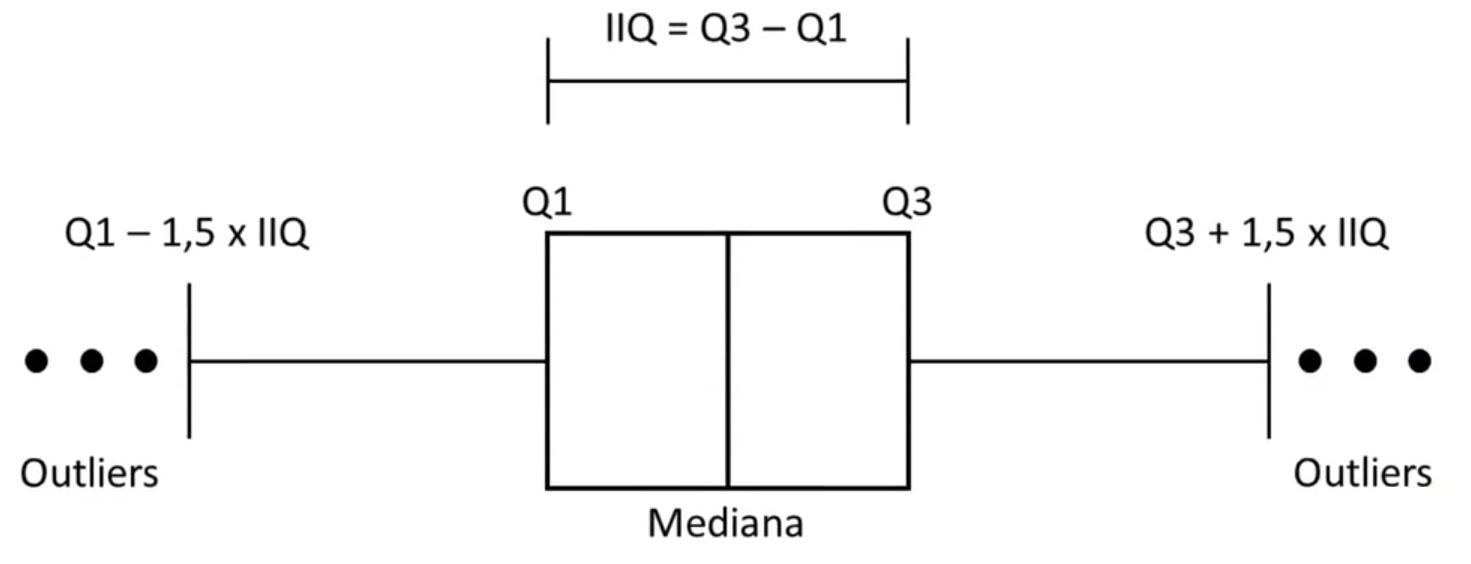

In [ ]:
df_sem_nulo.describe()

**count:** Contagem de amostras\
**mean:** Média\
**std**: Desvio padrão\
**min:** Valor mínimo\
**25%:** Q1 no boxplot\
**50%:** Q2 ou mediana\
**75%:** Q3 no boxplot


In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(x=df_sem_nulo['cliente.tempo_servico'])

In [ ]:
# Cálculo do boxplot
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR


In [ ]:
outliers_index = (df_sem_nulo['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulo['cliente.tempo_servico'] > limite_superior)
outliers_index


In [ ]:
# Utilizando o filtro criado apenas na coluna tempo de serviço para verificar os outiliers
# valores referentes aos pontos que aparecem no boxplot criado
df_sem_nulo[outliers_index]['cliente.tempo_servico']

Visto que o objetivo do tratamento da base de dados é para preparar os dados para serem utilizados em um modelode machine learning. O tratamento de outliers é muito importantes, pois sem o tratamento o modelo estaria aprendendo com padrões incorretos.

# Substituindo valores paraos outliers

In [ ]:
df_sem_out = df_sem_nulo.copy()

In [ ]:
df_sem_out[outliers_index]['cliente.tempo_servico']

In [ ]:
# Corrigindo os valores outliers, visto que seu resultado tem relação com valores de outras linhas
# Tratamento esse que já foi realizado anteriormente em outros índices
df_sem_out.loc[outliers_index, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index, 'conta.cobranca.Total'] /
    df_sem_out.loc[outliers_index, 'conta.cobranca.mensal']
)

In [ ]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [ ]:
# Verificando os valores ainda existentes
# Mesmo após o cálculo algumas amostras continuam sendo outliers
df_sem_out [outliers_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]


# Removendo outliers


In [ ]:
# Filtro anterior está comprometido com os valores que foram atualizados
df_sem_out [outliers_index]['cliente.tempo_servico']

In [ ]:
# Recalculando os outliers com o df que estava sendo trabalhado
# df_sem_out
Q1 = df_sem_out['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_out['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

outliers_index = (df_sem_out['cliente.tempo_servico'] < limite_inferior) | (df_sem_out['cliente.tempo_servico'] > limite_superior)
outliers_index


In [ ]:
# Verificando amostras restantes
df_sem_out[outliers_index]

In [ ]:
# Realizando a filtragem utilizando o sinal de negação ~
# Seleciona apenas os indices que não fazem parte do outliers_index
df_sem_out = df_sem_out[~outliers_index]
df_sem_out

In [ ]:
# Verificando o box plot apos a limpeza
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [ ]:
# Resetando os indices
df_sem_out.reset_index(drop=True, inplace=True)
df_sem_out

# Trabalhando com variáveis categóricas

Variáveis categóricas são uma forma de agrupar informações em categorias diferentes, sem um valor numérico associado a elas, como o caso das variáveis numéricas.

## Substituindo valores

In [ ]:
# Removendo a coluna id cliente, por ser uma coluna com dados distintos que não trazem informções relevantes
# para o modelo de machine learning
df_sem_id = df_sem_out.drop('id_cliente', axis=1).copy()
df_sem_id

**variáveis categóricas binárias:** Possuem apenas duas categorias distintas

Modelos de machine learning trabalham melhor com valores númericos. Devido a isso, faremos a substituição das variáveis categóricas binárias para os valores númericos 0 e 1.

In [ ]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1,
}

In [ ]:
# Verificando os valores unicos de cada coluna, agora com o último df tratado
for col in df_sem_id.columns:
    print(f"Coluna: {col}")
    print(df_sem_id[col].unique())
    print("-" * 30)

In [ ]:
# Selecionando as colunas que possuem como valores apenas 'nao' e 'sim'
colunas = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

In [ ]:
# Fazendo a substituição com o método replace utilizando o dicionário 'mapeamento' como argumento
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)
df_sem_id

In [ ]:
for col in df_sem_id.columns:
    print(f"Coluna: {col}")
    print(df_sem_id[col].unique())
    print("-" * 30)

# One Hot Encoder (dummy)

In [ ]:
s = pd.Series(list('abca'))
s

In [ ]:
# cria novas colunas e aplica 1 onde é indicado o valor do índice correspondente no dataframe original.
pd.get_dummies(s, dtype=int)

In [ ]:
df_sem_id.info()

pd.get_dummies interpreta as colunas com Dtype object como colunas categóricas

In [ ]:
# obs: cria novas colunas para cada variável categorica não binário
# Salvando o novo dataframe comos valores de 0 e 1
df_dummies = pd.get_dummies(df_sem_id, dtype=int).copy()
df_dummies.head()

In [ ]:
df_dummies.columns

In [ ]:
# podemos perceber que com a nova atribuição, todos valores agora são númericos
df_dummies.info()